# Classification Algorithms

### Logistic Regression

In sklearn Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability.

The solvers implemented in the class LogisticRegression are 
* liblinear : It uses a coordinate descent (CD) algorithm. However, the CD algorithm implemented in liblinear cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes.
* lbfgs : It is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm, which belongs to quasi-Newton methods. 
  The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers.
* sag : It uses Stochastic Average Gradient descent. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.
* saga : It is a variant of “sag” that also supports the non-smooth penalty="l1". This is therefore the solver of choice for sparse multinomial logistic regression. It is also the only solver that supports penalty="elasticnet".
The “lbfgs”, “sag” and “newton-cg” solvers only support regularization or no regularization, and are found to converge faster for some high-dimensional data.

Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model, which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting.

<table left-margin="0", border="1">
<colgroup>
<col width="30%" />
<col width="17%" />
<col width="13%" />
<col width="17%" />
<col width="11%" />
<col width="12%" />
</colgroup>
<tbody valign="top">
<tr><td>&#160;</td>
<td colspan="5"><strong>Solvers</strong></td>
</tr>
<tr><td><strong>Penalties</strong></td>
<td><strong>‘liblinear’</strong></td>
<td><strong>‘lbfgs’</strong></td>
<td><strong>‘newton-cg’</strong></td>
<td><strong>‘sag’</strong></td>
<td><strong>‘saga’</strong></td>
</tr>
<tr><td>Multinomial + L2 penalty</td>
<td>no</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
</tr>
<tr><td>OVR + L2 penalty</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
</tr>
<tr><td>Multinomial + L1 penalty</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>yes</td>
</tr>
<tr><td>OVR + L1 penalty</td>
<td>yes</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>yes</td>
</tr>
<tr><td>Elastic-Net</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>yes</td>
</tr>
<tr><td>No penalty (‘none’)</td>
<td>no</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
</tr>
<tr><td><strong>Behaviors</strong></td>
<td colspan="5">&#160;</td>
</tr>
<tr><td>Penalize the intercept (bad)</td>
<td>yes</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>no</td>
</tr>
<tr><td>Faster for large datasets</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>yes</td>
<td>yes</td>
</tr>
<tr><td>Robust to unscaled datasets</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>no</td>
<td>no</td>
</tr>
</tbody>
</table>

**The “lbfgs” solver is used by default for its robustness. For large datasets the “saga” solver is usually faster.**

For large dataset, you may also consider using SGDClassifier with ‘log’ loss, which might be even faster but requires more tuning.

## Business Case
**Problem Statement**

A Bank wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
These details are given below. 

To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 

Here they have provided a partial data set.

**The Data**

The Data has following parameters

![](bankloan.png)


#### 1. Import Data

In [1]:
from pandas import read_csv
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sc
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm 
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfcl = read_csv("C:\\Users\\skbho\\Downloads\\SAMPLE.csv")
dfcl.head()

,Loan_ID,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,Male,No,0,Graduate,No,5849,0.0,-1,360,1,Urban
1,LP001003,0,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural
2,LP001005,1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban
3,LP001006,1,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban
4,LP001008,1,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban


###  Data Preperation

**Case of categorical variable interaction.**

As we can see there are many categorical variables. Multicollinearity of them is not statistically valid. 
However, There may be redundant categorical columns which might impact logistic regression. 
To eliminate it, Pearson's correlation is ineffective.

Hence there are following methods used with thier limitations.

| |Method|Limitations|
|:-|:----|:----------|
|1|Spearman Rank Correlation|any Rank correlation only works with Ordinal variables|
|2|VIF|VIF gives higher values for `nominal variables with categories > 5 and discrete variables`,  which might suggest elimination. Hence care needs to taken.|
|3|Mutual Information| It is good for all categorical variables, but not discrete variables and it can only be used with two variables at a time. Multivariable interaction need more complex coding|

In [3]:
#Let us factorize data (we have  binary and nominal categorical variables )
ncols=dfcl.columns
for cols in ncols:
    dfcl[cols],unique=pd.factorize(dfcl[cols])

In [4]:
print(dfcl.nunique())
x=dfcl.drop(columns=["Loan_ID"])
# We will use VIF but VIF is not useful with discrete non-ordinal variables like LoanAmount and Loan_Amount_Term. It will give high VIF for them, which we will ignore
def vifcal(x):
#     Calculating VIF
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)
    
vifcal(x)



Loan_ID              614
Loan_Status            2
Gender                 3
Married                3
Dependents             4
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
dtype: int64


,Features,VIF
0,Loan_Status,1.535680
1,Gender,1.296131
2,Married,2.912213
3,Dependents,1.898343
4,Education,1.313336
5,Self_Employed,1.169587
6,ApplicantIncome,3.986918
7,CoapplicantIncome,2.228462
8,LoanAmount,3.019496
9,Loan_Amount_Term,1.190993


In [5]:
#let us write interaction function for MI
MI=np.ndarray((len(cols),len(cols)))
def interaction_mi(xdf,N) :
    cols=xdf.columns.to_list()
    MI=np.ndarray((len(cols),len(cols)))
    xdf_MI = pd.DataFrame(columns=cols)
    xdf_MI=xdf_MI.astype('float64')
    for i in range(xdf.shape[1]):
        MI[i]=mutual_info_classif(xdf,xdf.iloc[:,i],n_neighbors=N)
        x=MI.tolist()
        y=pd.Series(index=cols,name=xdf.columns[i],data=np.round(x[i],decimals=1))
        xdf_MI=xdf_MI.append(y)
    return(xdf_MI)

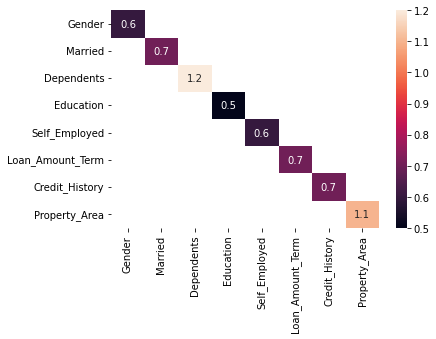

In [6]:
#Let us test data for interaction
dfcl_fr=dfcl.drop(columns=["Loan_Status","Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"])
dfcl_M=interaction_mi(dfcl_fr,3)

p=dfcl_M[dfcl_M[dfcl_M.columns] > 0.1]  
sns.heatmap(p, annot=True)
plt.show()

It is good to see that no categorical variables are interacting.

In [7]:
#Encode all categorical variables.
dfcl_onehot = pd.get_dummies(dfcl, prefix_sep="__",
                              columns=["Gender","Married","Education","Self_Employed","Credit_History","Property_Area"])
ncols=["Gender","Married","Education","Self_Employed","Credit_History","Property_Area"]

#### 3. Split Dataset into train and test datasets

In [8]:
dfcl_train, dfcl_test = train_test_split(dfcl_onehot, test_size=0.3)
dfcl_train_LID = dfcl_train.filter(["Loan_ID"])
dfcl_train = dfcl_train.drop(columns="Loan_ID")
dfcl_test_LID = dfcl_test.filter(["Loan_ID"])
dfcl_test = dfcl_test.drop(columns="Loan_ID")
dfcl_train.head(10)

,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender__0,Gender__1,Gender__2,Married__0,...,Education__1,Self_Employed__0,Self_Employed__1,Self_Employed__2,Credit_History__0,Credit_History__1,Credit_History__2,Property_Area__0,Property_Area__1,Property_Area__2
564,1,2,471,0,48,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
38,0,0,29,27,34,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
123,0,2,109,0,53,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
29,0,2,28,20,3,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
12,0,2,12,10,12,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
275,0,1,242,142,19,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
497,0,0,412,233,58,10,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
31,1,0,30,0,30,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
433,0,0,362,202,136,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
34,1,3,33,23,32,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


**Balanced data**

We check dataset for balanced data i.e.it has equal samples for all the classes).
Unbalanced data, i.e. data that has more samples for one class than others, can make the classifier biased toward the one or two classes with lots of samples, while dwarfing others that have less.
i.e. the classifier learns the classes with more samples better and remains weak on the smaller classes.
Let us check target variable for class balance.

In [9]:
dfcl_train.Loan_Status.value_counts()

0    292
1    137
Name: Loan_Status, dtype: int64

Our dataset is unbalanced as it has more samples for 1 class(295) than 0 class(134). 

There are various ways data can be balanced as below:

Subsampling: Taking a smaller yet equal selection of samples from each class. 

Upsampling: Taking repeat samples from some classes to increase its numbers.

Resampling : using an algorithm like SMOTE to augment the dataset with artificial data.

In [10]:
# Let us balance train data frame using resampling
from sklearn.utils import resample

In [11]:
# Separate majority and minority classes
dfcl_train_majority = dfcl_train[dfcl_train.Loan_Status==0]
dfcl_train_minority = dfcl_train[dfcl_train.Loan_Status==1]
 
### 1. Upsample minority class
dfcl_train_minority_upsampled = resample(dfcl_train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=295,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
dfcl_train_upsampled = pd.concat([dfcl_train_majority, dfcl_train_minority_upsampled])
 
# Display new class counts
dfcl_train_upsampled.Loan_Status.value_counts()

### 2.  subsample minority class
dfcl_train_majority_subsampled = resample(dfcl_train_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=134,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
dfcl_train_subsampled = pd.concat([dfcl_train_majority_subsampled, dfcl_train_minority])
 
# Display new class counts
dfcl_train_subsampled.Loan_Status.value_counts()

1    137
0    134
Name: Loan_Status, dtype: int64

In [12]:
#split X and y for test and train
y_dfcl_train = dfcl_train_upsampled.filter(["Loan_Status"])
x_dfcl_train = dfcl_train_upsampled.drop(columns = ["Loan_Status"])
y_dfcl_test = dfcl_test.filter(["Loan_Status"])
x_dfcl_test = dfcl_test.drop(columns = ["Loan_Status"])

So we are ready to use Logistic Regression.

## A. Logistic Regression

#### 4. Initialize and fit logistic regression algorithm to training dataset

In [13]:
log_reg = LogisticRegression(max_iter=10000,solver="lbfgs")

log_reg.fit(x_dfcl_train,y_dfcl_train.values.ravel())

y_pred_logres_train = log_reg.predict(x_dfcl_train)

### determine accuracy of model
#### 5. Accuracy score from model

In [14]:
sc = log_reg.score(x_dfcl_train,y_dfcl_train.values.ravel())
print(sc)
# Is our model still predicting just one class?
print( np.unique( y_pred_logres_train, return_counts=True ) )
# [0 1]
 #print(log_reg.coef_)
#print("intercepts :",log_reg.intercept_)

0.7632027257240205
(array([0, 1], dtype=int64), array([349, 238], dtype=int64))


#### 6. Calculate Deviance

Deviance is closely related to cross entropy, which is log_loss in sklearn.metrics.log_loss. 

Deviance = 2*(loglikelihood_of_saturated_model - loglikelihood of fitted model)

Scikit learn can (without larger tweaks) only handle classification of individual instances, so that the log-likelihood of the saturated model is going to be zero. 

Cross entropy as returned by log_loss is the negative log-likelihood. Thus, the deviance is simply 2*log_loss(x,y)

In [15]:
from sklearn.metrics import log_loss
deviance = 2*log_loss(y_dfcl_train, log_reg.predict_log_proba(x_dfcl_train))
print("Deviance :", deviance)

Deviance : 1.3862943611198906


#### 7. Measure Accuracy performance of classification

 AUC for ROC should be >= 0.5

In [16]:
def model_perf(x,y,model):
    # 1. Confusion Metrics
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y, model.predict(x))
    print(confusion_matrix)
    # 2. Compute Precision, Recall and F-score
    from sklearn.metrics import classification_report
    reprt = classification_report(y, model.predict(x),output_dict=True)
    class_rep = pd.DataFrame(data=reprt)
    print(class_rep)
    # 3. Plot ROC curve and Compute AUC
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    cls_roc_auc = roc_auc_score(y, model.predict(x))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    print("AUC :",cls_roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='AUC = %0.2f' % cls_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

[[102  28]
 [ 23  32]]
                    0          1  accuracy   macro avg  weighted avg
precision    0.816000   0.533333  0.724324    0.674667      0.731964
recall       0.784615   0.581818  0.724324    0.683217      0.724324
f1-score     0.800000   0.556522  0.724324    0.678261      0.727615
support    130.000000  55.000000  0.724324  185.000000    185.000000
AUC : 0.6832167832167833


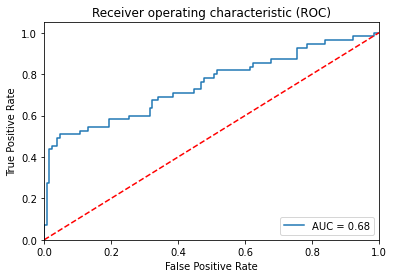

In [17]:
model_perf(x_dfcl_test,y_dfcl_test,log_reg)

## B. naive Bayes' Classification

#### 1. Check distribution of predictors

Since we have 3 Features that are continuos and rest are categorical we will fit GaussianNB first, 
for that we need to check their density distributions.


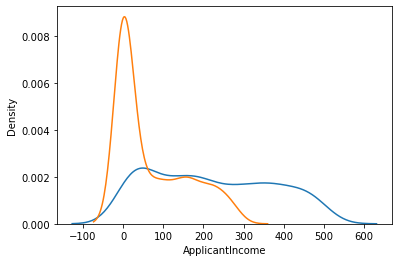

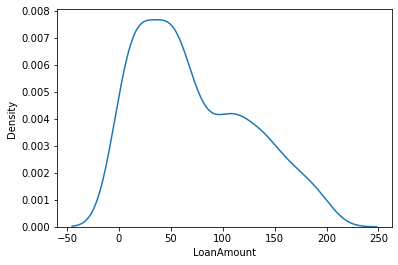

In [18]:
sns.kdeplot(data=x_dfcl_train.ApplicantIncome)
sns.kdeplot(data=x_dfcl_train.CoapplicantIncome)
plt.show()
sns.kdeplot(data=x_dfcl_train.LoanAmount)
plt.show()

Now that we are confirm that all are nearly normally distributed let us use gaussianNB<br>


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb_cls = GaussianNB()
gnb_cls.fit(x_dfcl_train,y_dfcl_train.values.ravel())

GaussianNB()

#### 2. Measure Model Accuracy

0.6678023850085179
[[53 77]
 [ 9 46]]
                    0          1  accuracy   macro avg  weighted avg
precision    0.854839   0.373984  0.535135    0.614411      0.711882
recall       0.407692   0.836364  0.535135    0.622028      0.535135
f1-score     0.552083   0.516854  0.535135    0.534469      0.541610
support    130.000000  55.000000  0.535135  185.000000    185.000000
AUC : 0.622027972027972


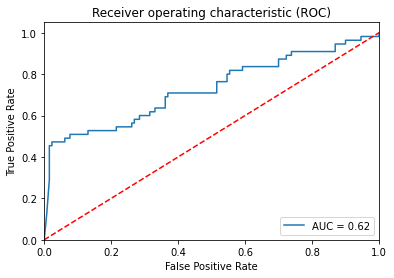

In [20]:
print(gnb_cls.score(x_dfcl_train,y_dfcl_train))
model_perf(x_dfcl_test,y_dfcl_test,gnb_cls)
y_pred_gnb = gnb_cls.predict(x_dfcl_test)

In [21]:
print(gnb_cls.score(x_dfcl_test,y_dfcl_test))

0.5351351351351351


# Results on Training dataset using hyperparameter tuning 

In [22]:
logModel = LogisticRegression()

In [23]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 6, 40),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,1000]
    }
]

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [26]:
best_clf = clf.fit(x_dfcl_train,y_dfcl_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [27]:
best_clf.best_estimator_


LogisticRegression(C=0.06614740641230146, solver='newton-cg')

In [29]:
print (f'Accuracy - : {best_clf.score(x_dfcl_train,y_dfcl_train):.3f}')

Accuracy - : 0.761


## Result of Test dataset

In [28]:
print (f'Accuracy - : {best_clf.score(x_dfcl_test,y_dfcl_test):.3f}')

Accuracy - : 0.741


## Solution to the given problem statement:-

By using hyperparameter tuning we trained the data set and improved the accuracy of the model.The following model parameters were user:-
1.The penalty in Logistic Regression Classifier i.e. L1 or L2 regularization
2.The C parameter
After getting the result the best parameters were used.
The result using logistic regression were 64% but later by using hyperparameter tuning to the logistic regression the result i.e. the accurqcy predicted is 74.1%
The best combination of hyperparameters values were used after trying out different combinations.